In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pyhf
from pathlib import Path

from publik.reweight import eos_modifier
from publik.weights import utils as wutils
from publik.reweight import utils as rwutils
from publik.reweight import plot

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use(Path('../style.mplstyle'))
# matplotlib.style.use('default')
matplotlib.rcParams["text.usetex"] = False

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


# Plot yields as a function of WCs

In [2]:
# Get the q2 distribution
q2json = '../pyhf_inputs/pyhf_Bplus2Kplus_v24_with_continuum_weights_no_ff_q2.json'

q2dist, q2binning = rwutils.getQ2Distributions(q2json)
q2binning_cut = np.where(q2binning > 0, q2binning, 0)
q2binning_cut = np.where(q2binning_cut < wutils.kinlim(), q2binning_cut, wutils.kinlim())

# Analytic normalization
PHSP = wutils.computePHSP(q2binning_cut)
# SM normalization
BRSM = wutils.computeBR()
norm = PHSP * BRSM

# Set up the custom modifier
expanded_pyhf = eos_modifier.add(q2binning_cut, q2dist, norm)

# Get the pyhf model and data
pdf, data, observations = rwutils.getPDF("../pyhf_inputs/pyhf_Bplus2Kplus_v24_with_continuum_weights_no_ff_wilson.json", validate=False, modifier_set=expanded_pyhf, return_obs=True)

INFO:EOS:Creating analysis with 8 priors, 2 EOS-wide constraints, 0 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:Creating analysis with 8 priors, 2 EOS-wide constraints, 0 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:Creating analysis with 8 priors, 2 EOS-wide constraints, 0 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:Creating analysis with 8 priors, 2 EOS-wide constraints, 0 global options, 0 manually-entered constraints and 0 fixed parameters.


Pre-runs:   0%|          | 0/3 [00:00<?, ?it/s]

INFO:EOS:Prerun 0 out of 3
INFO:EOS:Prerun 0: acceptance rate is   1%
INFO:EOS:Prerun 1 out of 3
INFO:EOS:Prerun 1: acceptance rate is   2%
INFO:EOS:Prerun 2 out of 3
INFO:EOS:Prerun 2: acceptance rate is  12%
INFO:EOS:Main run: started ...


Main run:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:EOS:Main run: acceptance rate is  26%
INFO:pyhf.pdf:adding modifier cvl (1 new nuisance parameters)
INFO:pyhf.pdf:adding modifier csl (1 new nuisance parameters)
INFO:pyhf.pdf:adding modifier ctl (1 new nuisance parameters)
INFO:pyhf.pdf:adding modifier ffpca0 (1 new nuisance parameters)
INFO:pyhf.pdf:adding modifier ffpca1 (1 new nuisance parameters)
INFO:pyhf.pdf:adding modifier ffpca2 (1 new nuisance parameters)
INFO:pyhf.pdf:adding modifier ffpca3 (1 new nuisance parameters)
INFO:pyhf.pdf:adding modifier ffpca4 (1 new nuisance parameters)
INFO:pyhf.pdf:adding modifier ffpca5 (1 new nuisance parameters)
INFO:pyhf.pdf:adding modifier ffpca6 (1 new nuisance parameters)
INFO:pyhf.pdf:adding modifier ffpca7 (1 new nuisance parameters)
INFO:pyhf.pdf:adding modifier corr_neutralGamma_c (1 new nuisance parameters)
INFO:pyhf.pdf:adding modifier corr_neutralUnmatched_c (1 new nuisance parameters)
INFO:pyhf.pdf:adding modifier corr_pid_c1 (1 new nuisance parameters)
INFO:pyhf.pdf:adding 

/tmp/ipykernel_8771/2686543629.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontsize=11)


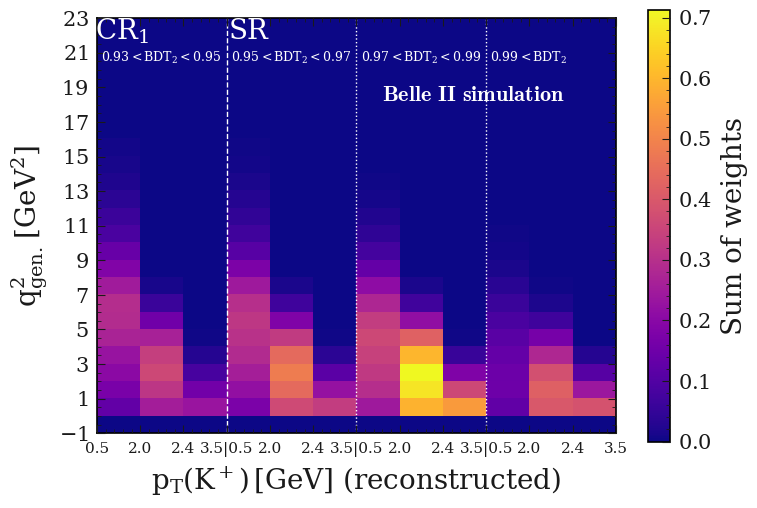

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

order = [9,10,11,0,1,2,3,4,5,6,7,8]
plt_q2dist = np.flip(q2dist[:12], axis=1)[order].T

plt.imshow(plt_q2dist, cmap='plasma', extent=[0.5,12.5,-1,23])
ax.set_aspect(.4)

ax.axvline(x=3.5, color='white', linestyle='--',lw=1.0)
ax.axvline(x=6.5, color='white', linestyle=':',lw=1.0)
ax.axvline(x=9.5, color='white', linestyle=':',lw=1.0)

bins = np.arange(0.5, 13.5, 1)
labels = [0.5, 2.0, 2.4, '3.5|0.5', 2.0, 2.4, '3.5|0.5', 2.0, 2.4, '3.5|0.5', 2.0, 2.4, 3.5]
ax.set_xticklabels(labels, fontsize=11)
ax.set_xticks(bins)
ax.set_yticks(np.arange(-1,24,2))
ax.set_xlabel(r'$p_T(K^+)\,[GeV]$ (reconstructed)')
ax.set_ylabel(r'$q^2_{gen.}\,[GeV^2]$')

bdtsize=9
ax.text(0.6, ax.get_ylim()[1]-2.5, r'$0.93<BDT_2<0.95$',       fontsize=bdtsize, color='white')
ax.text(3.6, ax.get_ylim()[1]-2.5, r'$0.95<BDT_2<0.97$',  fontsize=bdtsize, color='white')
ax.text(6.6, ax.get_ylim()[1]-2.5, r'$0.97<BDT_2<0.99$',  fontsize=bdtsize, color='white')
ax.text(9.6, ax.get_ylim()[1]-2.5, r'$0.99<BDT_2$',  fontsize=bdtsize, color='white')

ax.text(0.45, ax.get_ylim()[1]-1.2, r'$CR_1$', color='white')
ax.text(3.55, ax.get_ylim()[1]-1.2, 'SR', color='white')

plot.b2_logo(x=0.55, y=0.8, ax=ax, fontsize=16, c='w', is_data=False, two_lines=False)


plt.colorbar(orientation='vertical', label='Sum of weights', shrink=0.85)

fig.tight_layout()
plt.savefig('../results/fit/q2distributionBin.pdf')
plt.show()

In [4]:
par_one = pdf.config.suggested_init()
par_one[0] = 0
par_one[1] = 0
par_one[2] = 0

In [5]:
pdf.expected_actualdata(par_one)

/nfs/dust/belle1/user/lorenzg/publik/publik/weights/utils.py:160: RuntimeWarning: invalid value encountered in divide
  weights = BR/norm


array([2.42524599e+02, 2.01673906e+02, 7.76296071e+01, 1.20936780e+02,
       1.21518270e+02, 5.23459898e+01, 1.29589368e+01, 2.10387238e+01,
       7.75269138e+00, 3.57504468e+02, 2.64144942e+02, 1.07295350e+02,
       1.55578110e+01, 2.24936310e+01, 1.08283480e+01, 5.25470600e+00,
       1.02494860e+01, 5.70294900e+00, 1.25095000e-01, 7.59401000e-01,
       3.54215000e-01, 2.27810300e+01, 2.70718710e+01, 1.70079660e+01])

/nfs/dust/belle1/user/lorenzg/publik/publik/reweight/plot.py:155: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontsize=9)


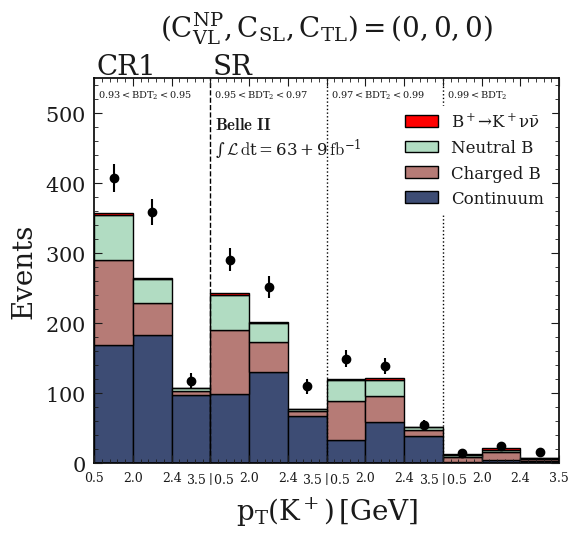

In [6]:
par_name_dict = {k: v["slice"].start for k, v in pdf.config.par_map.items()}

fig, ax = plt.subplots()
fig.set_size_inches(6, 5)
# fig.set_layout_engine(layout='tight')

# ax.set_title(f'best fit µ = {par_one[pdf.config.poi_index]:.3g}')
plot.yieldsSR(pdf, observations, par_name_dict, ax=ax, **{k: par_one[v] for k, v in par_name_dict.items()})
ax.set_title(r'$(C_{VL}^{NP}, C_{SL}, C_{TL})=(0,0,0)$', pad=30, size=20)

plt.savefig('../results/fit/WCyields_nom.pdf')
plt.show()

In [7]:
# import ipywidgets as widgets

# slider_cvl = widgets.FloatSlider(
#     0.0, min=-30, max=30.0, description="cVL", continuous_update=False
# )
# slider_csl = widgets.FloatSlider(
#     0.0, min=-30, max=30.0, description="cSL", continuous_update=False
# )
# slider_ctl = widgets.FloatSlider(
#     0.0, min=-30, max=30.0, description="cTL", continuous_update=False
# )

# def plot_wig(cvl, csl, ctl):
#     par_one = pdf.config.suggested_init()
#     par_one[0] = cvl
#     par_one[1] = csl
#     par_one[2] = ctl
#     par_name_dict = {k: v["slice"].start for k, v in pdf.config.par_map.items()}

#     fig, ax = plt.subplots()
#     fig.set_size_inches(12, 5)
#     fig.set_layout_engine(layout='tight')

#     plot.yieldsSR(pdf, observations, par_name_dict, ax=ax, **{k: par_one[v] for k, v in par_name_dict.items()});
#     ax.legend(bbox_to_anchor=(1.05, 1))

#     plt.show()
#     # plt.bar(ctrs,pdf.expected_actualdata(pdf.config.suggested_init()), widths, edgecolor = 'k', alpha = 0.2)
#     # plt.bar(ctrs,pdf.expected_actualdata(par_one), widths, color='b', edgecolor = 'k', alpha = 0.2)
#     # plt.plot()
    
# interactive_plot = widgets.interactive_output(plot_wig, dict(cvl=slider_cvl, csl=slider_csl, ctl=slider_ctl))
# # interactive_plot.layout.height = "350px"

# display(
#     slider_cvl,
#     slider_csl,
#     slider_ctl,
#     interactive_plot
# )


/nfs/dust/belle1/user/lorenzg/publik/publik/reweight/plot.py:155: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontsize=9)
/nfs/dust/belle1/user/lorenzg/publik/publik/weights/utils.py:160: RuntimeWarning: invalid value encountered in divide
  weights = BR/norm


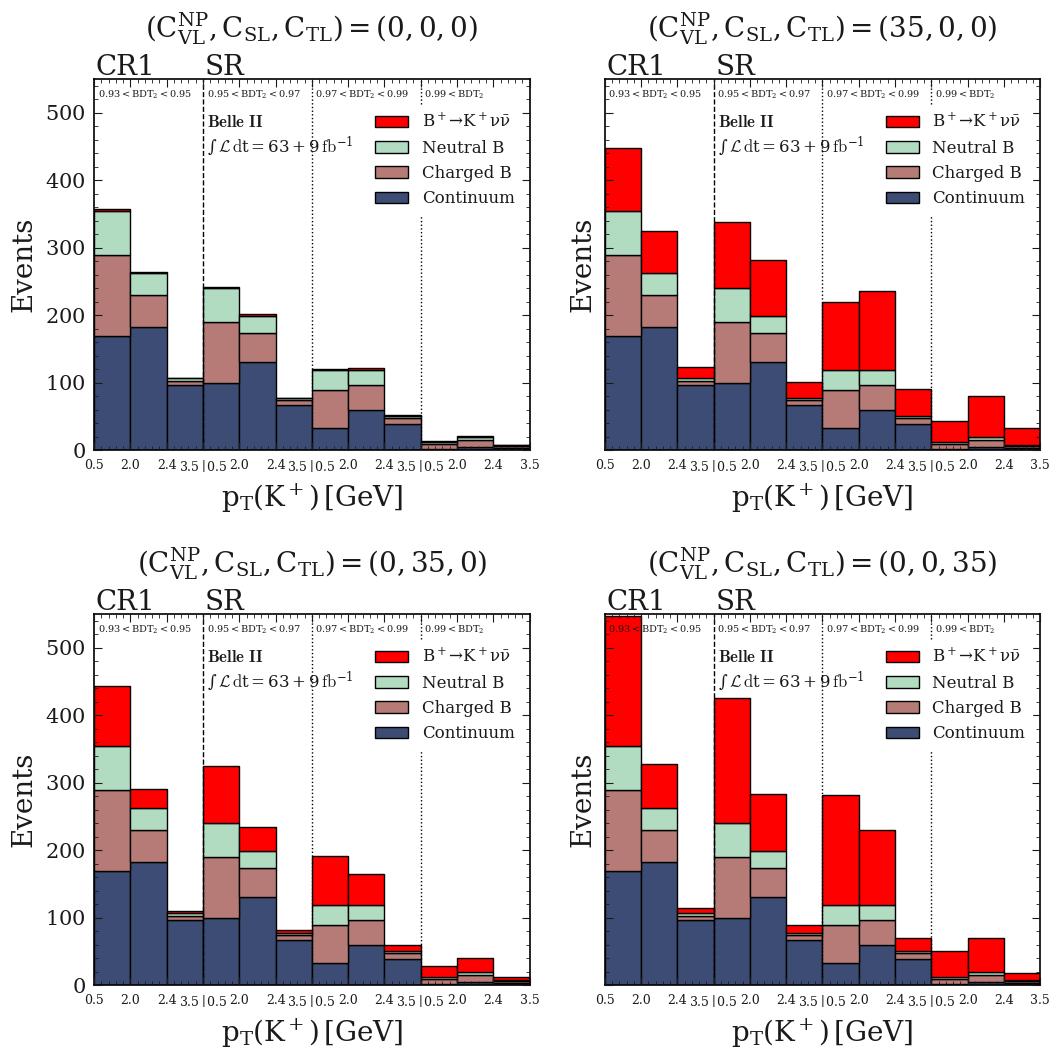

In [8]:
par_name_dict = {k: v["slice"].start for k, v in pdf.config.par_map.items()}
fit_pars = pdf.config.suggested_init()

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharey=True, sharex=False)
fig.set_size_inches(11, 11)
fig.set_layout_engine(layout='tight')

#ax1.set_ylim(0, 1.5 * np.max(workspace.data(pdf, include_auxdata=False)))

fit_pars[pdf.config.par_map['cvl']['slice']] = [0]
fit_pars[pdf.config.par_map['csl']['slice']] = [0]
fit_pars[pdf.config.par_map['ctl']['slice']] = [0]
ax0.set_ylabel(r'Events')
ax0.set_title(r'$(C_{VL}^{NP}, C_{SL}, C_{TL})=(0,0,0)$', pad=30, size=20)
plot.yieldsSR(pdf, observations, par_name_dict, ax=ax0, plot_obs=False, **{k: fit_pars[v] for k, v in par_name_dict.items()})

fit_pars[pdf.config.par_map['cvl']['slice']] = [35]
fit_pars[pdf.config.par_map['csl']['slice']] = [0]
fit_pars[pdf.config.par_map['ctl']['slice']] = [0]
ax1.set_title(r'$(C_{VL}^{NP}, C_{SL}, C_{TL})=(35,0,0)$', pad=30, size=20)
plot.yieldsSR(pdf, observations, par_name_dict, ax=ax1, plot_obs=False, **{k: fit_pars[v] for k, v in par_name_dict.items()})

fit_pars[pdf.config.par_map['cvl']['slice']] = [0]
fit_pars[pdf.config.par_map['csl']['slice']] = [35]
fit_pars[pdf.config.par_map['ctl']['slice']] = [0]
ax2.set_ylabel(r'Events')
ax2.set_title(r'$(C_{VL}^{NP}, C_{SL}, C_{TL})=(0,35,0)$', pad=30, size=20)
plot.yieldsSR(pdf, observations, par_name_dict, ax=ax2, plot_obs=False, **{k: fit_pars[v] for k, v in par_name_dict.items()})

fit_pars[pdf.config.par_map['cvl']['slice']] = [0]
fit_pars[pdf.config.par_map['csl']['slice']] = [0]
fit_pars[pdf.config.par_map['ctl']['slice']] = [35]
ax3.set_title(r'$(C_{VL}^{NP}, C_{SL}, C_{TL})=(0,0,35)$', pad=30, size=20)
plot.yieldsSR(pdf, observations, par_name_dict, ax=ax3, plot_obs=False, **{k: fit_pars[v] for k, v in par_name_dict.items()});

plt.savefig('../results/fit/WCyields.pdf')
plt.show()

In [9]:
pyhf.set_backend("numpy", pyhf.optimize.scipy_optimizer())
#pyhf.set_backend("numpy", pyhf.optimize.minuit_optimizer(verbose=True))

pdf.config.par_map['mu']['paramset'].suggested_bounds=[(-1000,1000)]
init_pars = pdf.config.suggested_init()
par_bounds = pdf.config.suggested_bounds()

nominal_background_only = pdf.config.suggested_init()
nominal_background_only[pdf.config.poi_index] = 0.0

background_only, twice_nll_bkg, OptimizeResult_bkg = pyhf.infer.mle.fixed_poi_fit(0.0, data, pdf, init_pars, par_bounds, 
                                                              return_fitted_val=True, return_result_obj=True)

best_fit, twice_nll, OptimizeResult = pyhf.infer.mle.fit(data, pdf, init_pars, par_bounds, 
                                                         return_fitted_val=True, return_result_obj=True)

yields = {k: v for k, v in zip(pdf.config.samples,
    pdf.main_model.expected_data(best_fit, return_by_sample=True))}

best_fit_dict = {k: best_fit[v["slice"]].tolist() for k, v in pdf.config.par_map.items()}

par_name_dict = {k: v["slice"].start for k, v in pdf.config.par_map.items()}

/nfs/dust/belle1/user/lorenzg/publik/publik/weights/utils.py:160: RuntimeWarning: invalid value encountered in divide
  weights = BR/norm


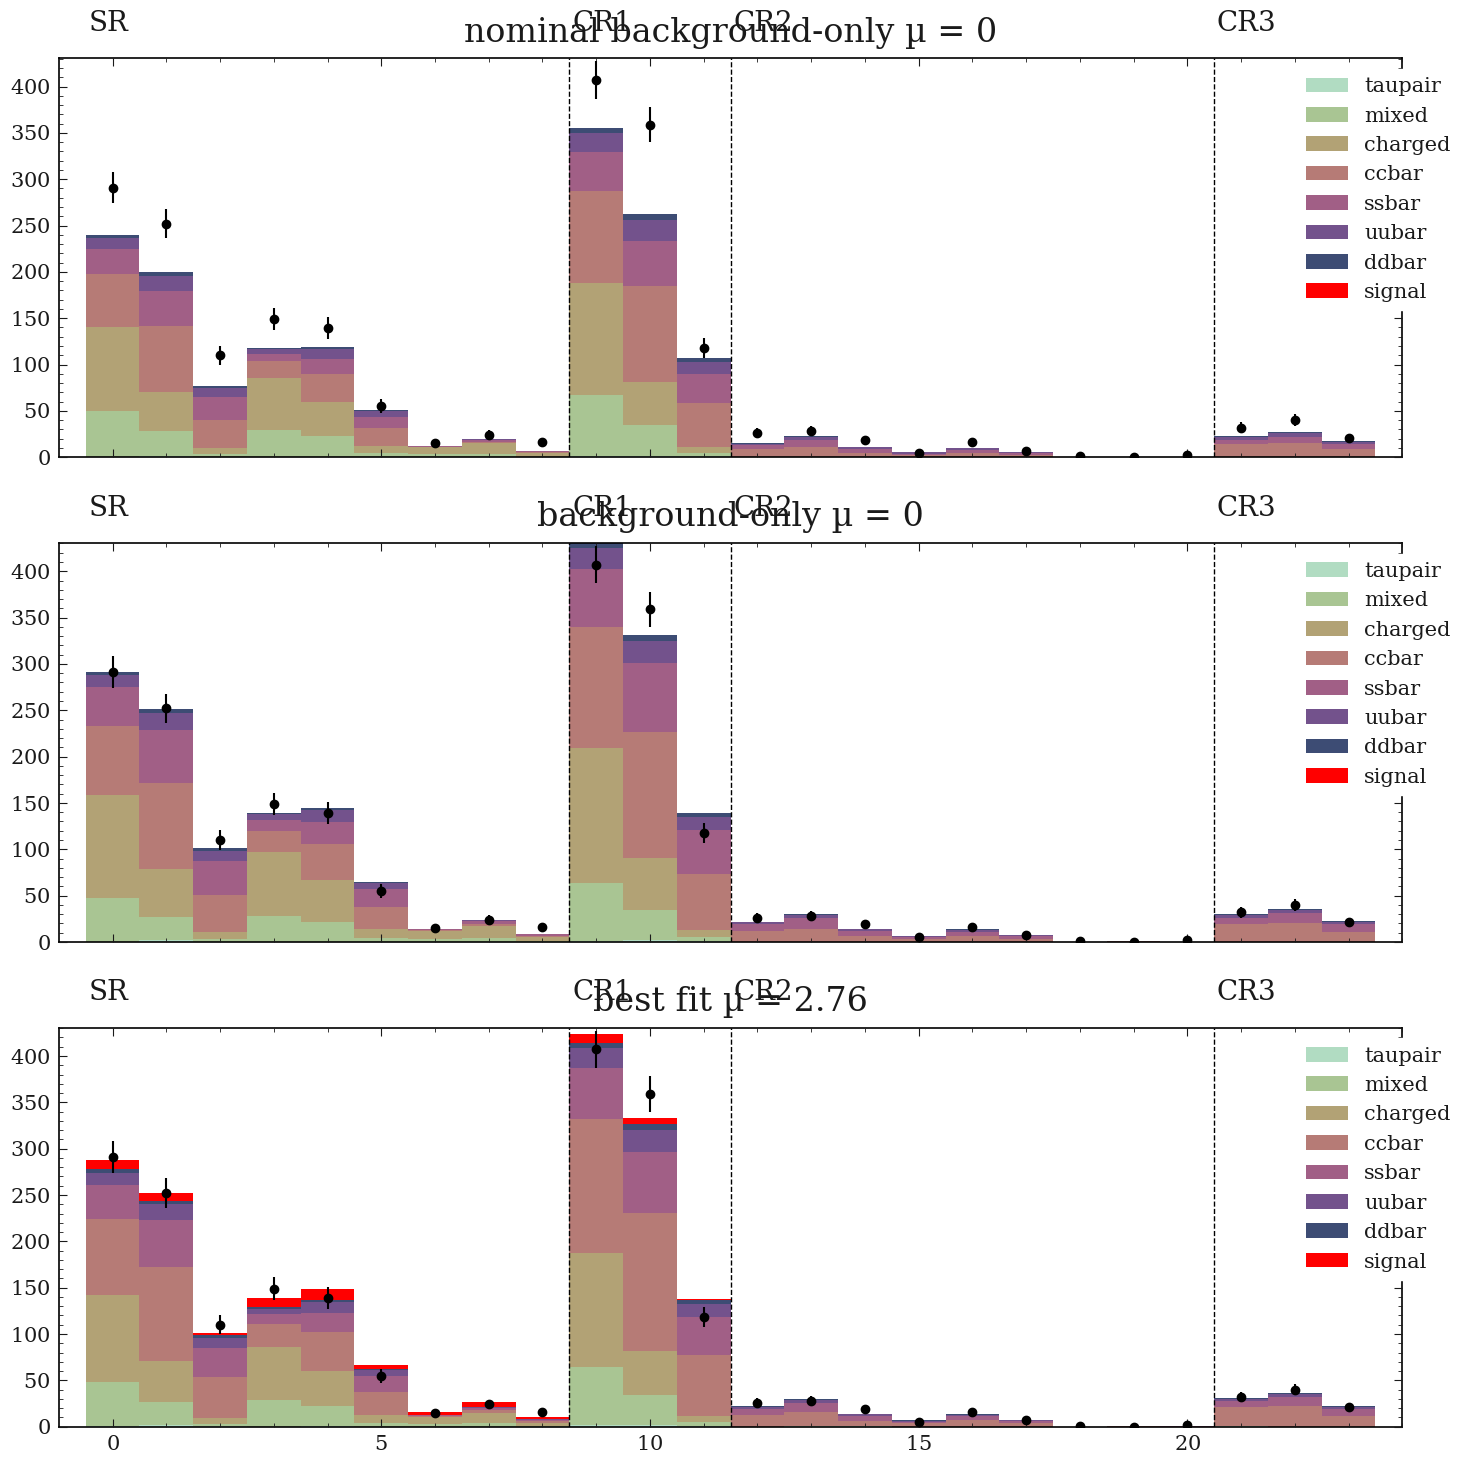

In [10]:

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=True, sharex=True)
fig.set_size_inches(15, 15)
fig.set_layout_engine(layout='tight')

#ax1.set_ylim(0, 1.5 * np.max(workspace.data(pdf, include_auxdata=False)))
ax1.set_title('nominal background-only µ = 0')
plot.yields(pdf, observations, par_name_dict, ax=ax1, **{k: nominal_background_only[v] for k, v in par_name_dict.items()})
ax1.legend(bbox_to_anchor=(1.05, 1))

ax2.set_title('background-only µ = 0')
plot.yields(pdf, observations, par_name_dict, ax=ax2, **{k: background_only[v] for k, v in par_name_dict.items()})
ax2.legend(bbox_to_anchor=(1.05, 1))


ax3.set_title(f'best fit µ = {best_fit[pdf.config.poi_index]:.3g}')
plot.yields(pdf, observations, par_name_dict, ax=ax3, **{k: best_fit[v] for k, v in par_name_dict.items()});
ax3.legend(bbox_to_anchor=(1.05, 1))

plt.show()